In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
def create_boro_chart(df, boro, value):
    temp = df[df["borough"] == boro]
    times = pd.date_range('2010', periods=12, freq='1Y')
    
    data = pd.Series(temp[value].to_list(), times)

    chart = pd.DataFrame({value: data})
    ax = chart.plot.bar(color=["SkyBlue"], rot=0, title=boro)
    ax.set_xlabel("date")
    ax.set_ylabel(value)
    ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%Y")))
    plt.show()
    return chart

In [5]:
df = pd.read_csv('ACS_estimates', skipinitialspace=True, low_memory = False)

,label,borough,total_housing_units,occupied_housing_units,vacant_housing_units,1_room_units,2_room_units,3_room_units,4_room_units,5_room_units,...,unit_4_bedrooms,unit_5+_bedrooms,owner_occupied_units,renter_occupied_units,occupants_per_room_<=1,occupants_per_room_1-1.5,occupants_per_room_>=1.5,owned_median_value,rent_median_value,year
0,Estimate,BRONX,552421.0,533004.0,19417.0,41219.0,26963.0,146200.0,157613.0,105460.0,...,19330.0,8072.0,104431.0,428573.0,466688.0,34715.0,31601.0,465000.0,1313.0,2021.0
1,Estimate,BROOKLYN,1085993.0,1001868.0,84125.0,72187.0,86381.0,255228.0,290858.0,185074.0,...,64302.0,27479.0,303368.0,698500.0,897263.0,57711.0,46894.0,793300.0,1628.0,2021.0
2,Estimate,MANHATTAN,916609.0,737575.0,179034.0,114310.0,122583.0,257394.0,220249.0,111670.0,...,27708.0,5870.0,184279.0,553296.0,703553.0,16501.0,17521.0,940900.0,1866.0,2021.0
3,Estimate,QUEENS,902754.0,820686.0,82068.0,53573.0,51206.0,190825.0,212947.0,159559.0,...,57648.0,24105.0,374621.0,446065.0,737482.0,49332.0,33872.0,642000.0,1717.0,2021.0
4,Estimate,STATEN ISLAND,184154.0,170762.0,13392.0,5897.0,4178.0,21285.0,23682.0,35537.0,...,22695.0,7366.0,119237.0,51525.0,161096.0,6259.0,3407.0,605500.0,1442.0,2021.0
5,Estimate,BRONX,552421.0,533004.0,19417.0,41219.0,26963.0,146200.0,157613.0,105460.0,...,19330.0,8072.0,104431.0,428573.0,466688.0,34715.0,31601.0,465000.0,1313.0,2020.0
6,Estimate,BROOKLYN,1085993.0,1001868.0,84125.0,72187.0,86381.0,255228.0,290858.0,185074.0,...,64302.0,27479.0,303368.0,698500.0,897263.0,57711.0,46894.0,793300.0,1628.0,2020.0
7,Estimate,MANHATTAN,916609.0,737575.0,179034.0,114310.0,122583.0,257394.0,220249.0,111670.0,...,27708.0,5870.0,184279.0,553296.0,703553.0,16501.0,17521.0,940900.0,1866.0,2020.0
8,Estimate,QUEENS,902754.0,820686.0,82068.0,53573.0,51206.0,190825.0,212947.0,159559.0,...,57648.0,24105.0,374621.0,446065.0,737482.0,49332.0,33872.0,642000.0,1717.0,2020.0
9,Estimate,STATEN ISLAND,184154.0,170762.0,13392.0,5897.0,4178.0,21285.0,23682.0,35537.0,...,22695.0,7366.0,119237.0,51525.0,161096.0,6259.0,3407.0,605500.0,1442.0,2020.0


In [ ]:
temp = df.sort_values(by=['borough','year'], ascending = False)
temp['rent % delta'] = (temp['rent_median_value'] - temp['rent_median_value'].shift(-1)) / temp['rent_median_value'] * 100


temp.loc[(temp['year'] == 2010), 'rent % delta'] = np.nan

temp

In [ ]:
temp = df.sort_values(by=['borough','year'], ascending = False)
temp['h_value % delta'] = (temp['owned_median_value'] - temp['owned_median_value'].shift(-1)) / temp['owned_median_value'] * 100


temp.loc[(temp['year'] == 2010), 'rent % delta'] = np.nan

temp

In [ ]:
temp.rent_median_value.diff().shift(-1)

In [ ]:
df['rent_units/tot_occ'] = df['renter_occupied_units'] / df['occupied_housing_units'] *100

<AxesSubplot:xlabel='borough'>

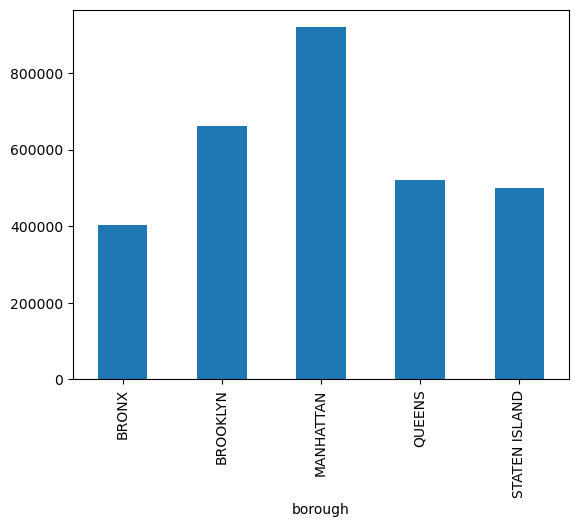

In [14]:
df.groupby(['borough'])['owned_median_value'].mean().plot(kind='bar')

<AxesSubplot:xlabel='borough'>

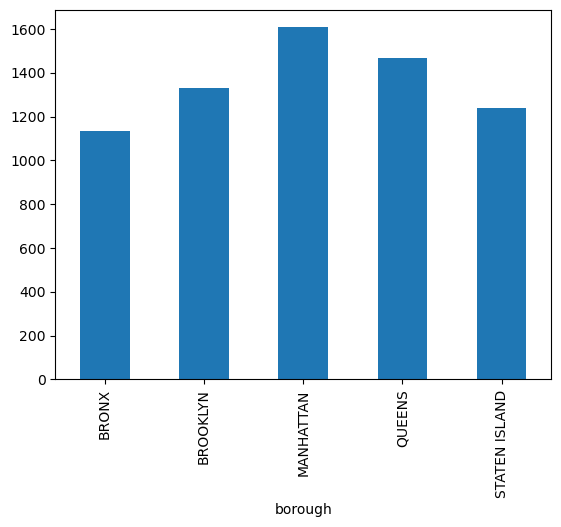

In [17]:
df.groupby(['borough'])['rent_median_value'].mean().plot(kind='bar')

<AxesSubplot:xlabel='year'>

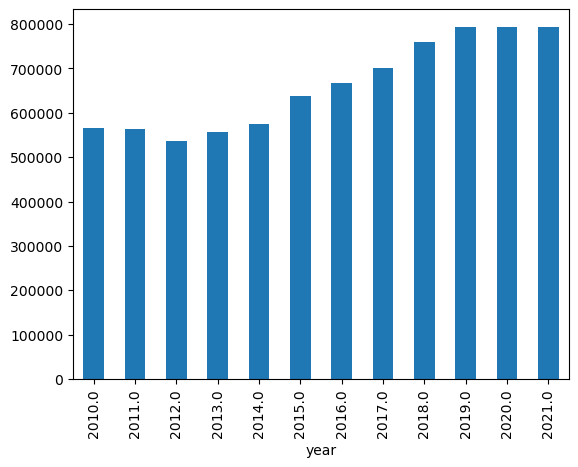

In [23]:
temp = df[df['borough']== 'BROOKLYN']
temp.groupby(['year'])['owned_median_value'].mean().plot(kind='bar')

<AxesSubplot:xlabel='year'>

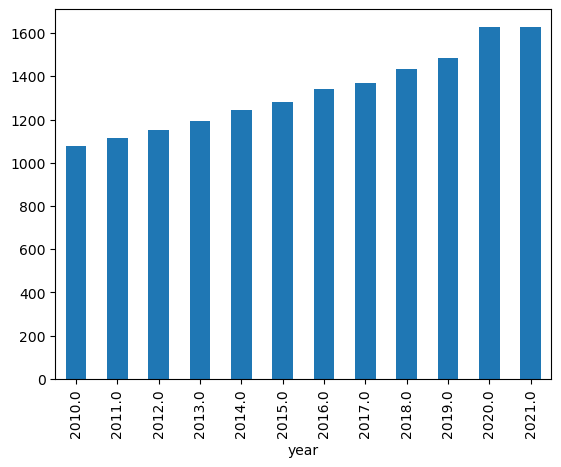

In [24]:
temp.groupby(['year'])['rent_median_value'].mean().plot(kind='bar')

In [28]:
temp = temp.reset_index(drop=True)

In [27]:
temp

,label,borough,total_housing_units,occupied_housing_units,vacant_housing_units,1_room_units,2_room_units,3_room_units,4_room_units,5_room_units,...,unit_4_bedrooms,unit_5+_bedrooms,owner_occupied_units,renter_occupied_units,occupants_per_room_<=1,occupants_per_room_1-1.5,occupants_per_room_>=1.5,owned_median_value,rent_median_value,year
1,Estimate,BROOKLYN,1085993.0,1001868.0,84125.0,72187.0,86381.0,255228.0,290858.0,185074.0,...,64302.0,27479.0,303368.0,698500.0,897263.0,57711.0,46894.0,793300.0,1628.0,2021.0
6,Estimate,BROOKLYN,1085993.0,1001868.0,84125.0,72187.0,86381.0,255228.0,290858.0,185074.0,...,64302.0,27479.0,303368.0,698500.0,897263.0,57711.0,46894.0,793300.0,1628.0,2020.0
11,Estimate,BROOKLYN,1065363.0,978091.0,87272.0,58238.0,64621.0,257419.0,308282.0,172845.0,...,69502.0,35797.0,291015.0,687076.0,880241.0,63989.0,33861.0,793600.0,1483.0,2019.0
16,Estimate,BROOKLYN,1053667.0,969317.0,84350.0,55239.0,65431.0,256072.0,297005.0,178695.0,...,66983.0,35275.0,296235.0,673082.0,877595.0,57106.0,34616.0,759400.0,1433.0,2018.0
21,Estimate,BROOKLYN,1044287.0,956223.0,88064.0,58381.0,59993.0,245543.0,301807.0,183293.0,...,67789.0,32023.0,290792.0,665431.0,864554.0,56410.0,35259.0,701800.0,1367.0,2017.0
26,Estimate,BROOKLYN,1031125.0,941871.0,89254.0,58185.0,49269.0,240581.0,295589.0,190514.0,...,58639.0,34293.0,277746.0,664125.0,841761.0,62879.0,37231.0,667000.0,1343.0,2016.0
31,Estimate,BROOKLYN,1025815.0,940176.0,85639.0,59187.0,53913.0,248163.0,300561.0,173089.0,...,57057.0,30196.0,270013.0,670163.0,834088.0,66960.0,39128.0,638500.0,1283.0,2015.0
36,Estimate,BROOKLYN,1022569.0,942402.0,80167.0,59066.0,52336.0,249561.0,293719.0,175126.0,...,53216.0,32507.0,268400.0,674002.0,840386.0,64163.0,37853.0,574800.0,1246.0,2014.0
41,Estimate,BROOKLYN,1006081.0,925489.0,80592.0,51674.0,49342.0,244510.0,283306.0,183362.0,...,55027.0,31189.0,274241.0,651248.0,831927.0,61886.0,31676.0,557000.0,1192.0,2013.0
46,Estimate,BROOKLYN,1003114.0,919333.0,83781.0,58675.0,47225.0,247283.0,290006.0,174261.0,...,56079.0,30603.0,273302.0,646031.0,819127.0,65181.0,35025.0,537500.0,1151.0,2012.0


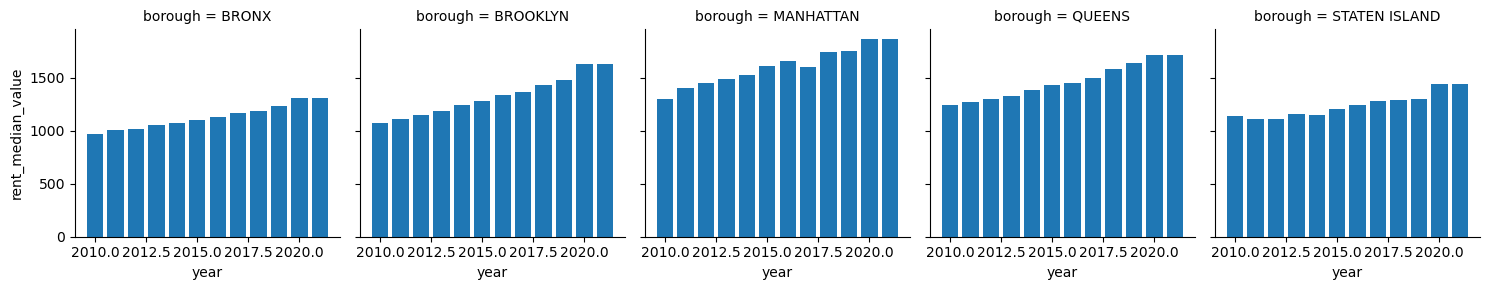

In [34]:
graph = sns.FacetGrid( df  , col = 'borough')
graph.map(plt.bar, 'year', 'rent_median_value')
plt.show()

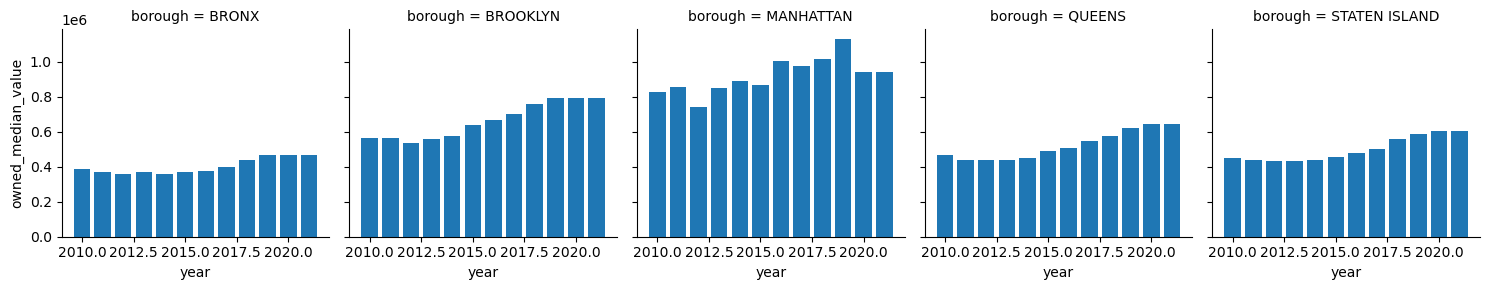

In [35]:
graph = sns.FacetGrid( df  , col = 'borough')
graph.map(plt.bar, 'year', 'owned_median_value')
plt.show()

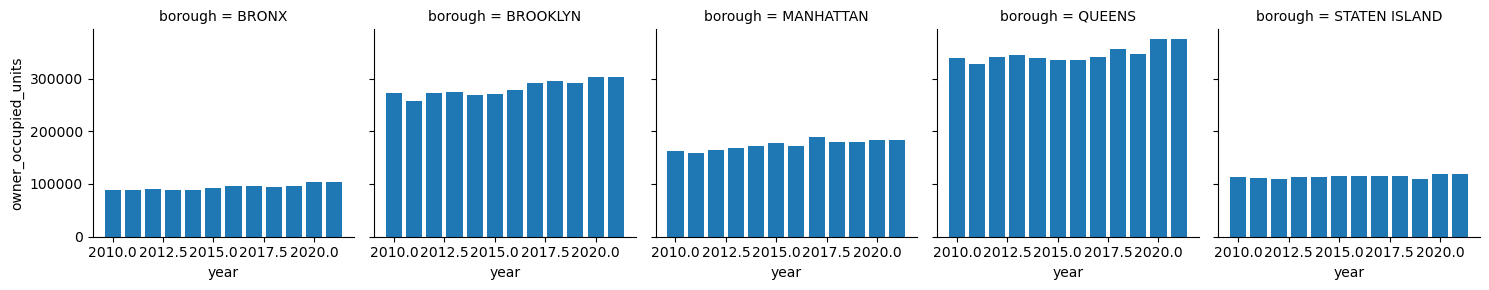

In [36]:
graph = sns.FacetGrid( df  , col = 'borough')
graph.map(plt.bar, 'year', 'owner_occupied_units')
plt.show()

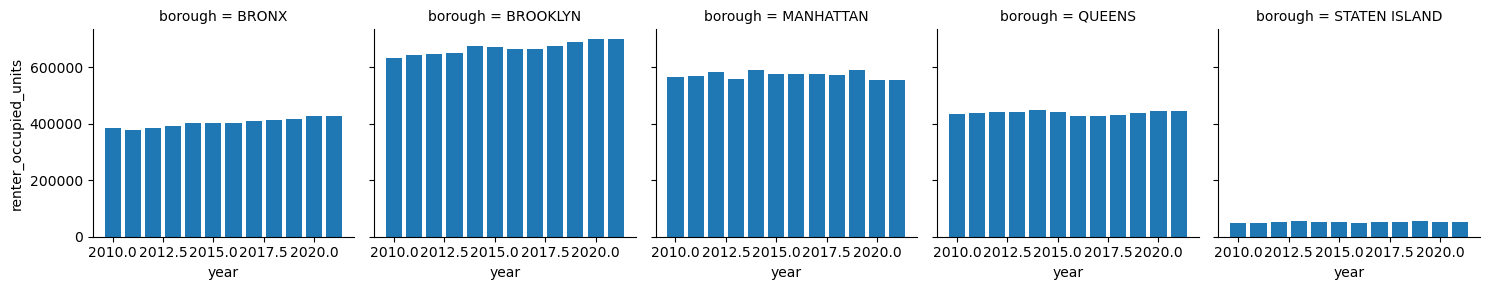

In [37]:
graph = sns.FacetGrid( df  , col = 'borough')
graph.map(plt.bar, 'year', 'renter_occupied_units')
plt.show()

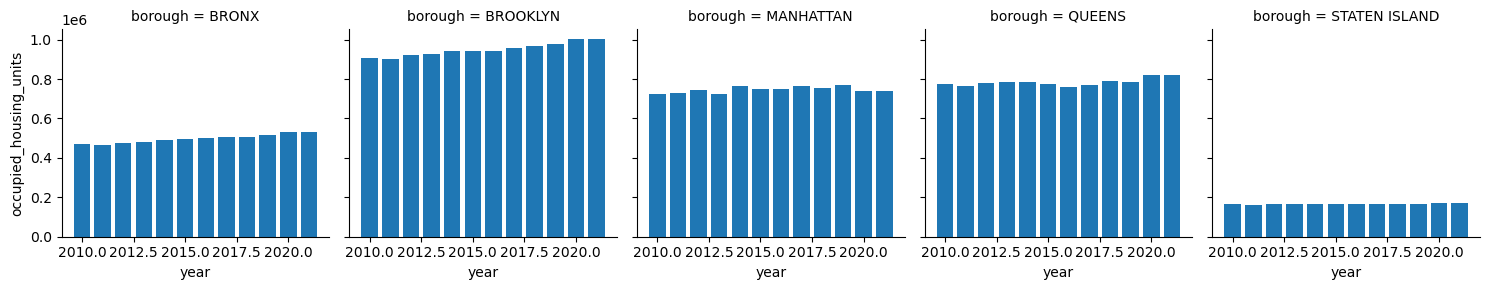

In [39]:
graph = sns.FacetGrid( df  , col = 'borough')
graph.map(plt.bar, 'year', 'occupied_housing_units')
plt.show()

In [48]:
df['rent_units/tot_occ'] = df['renter_occupied_units'] / df['occupied_housing_units'] *100

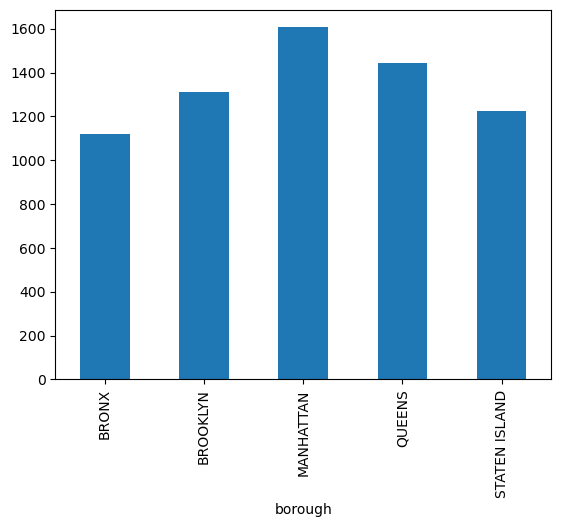

/Users/sergioferreira/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


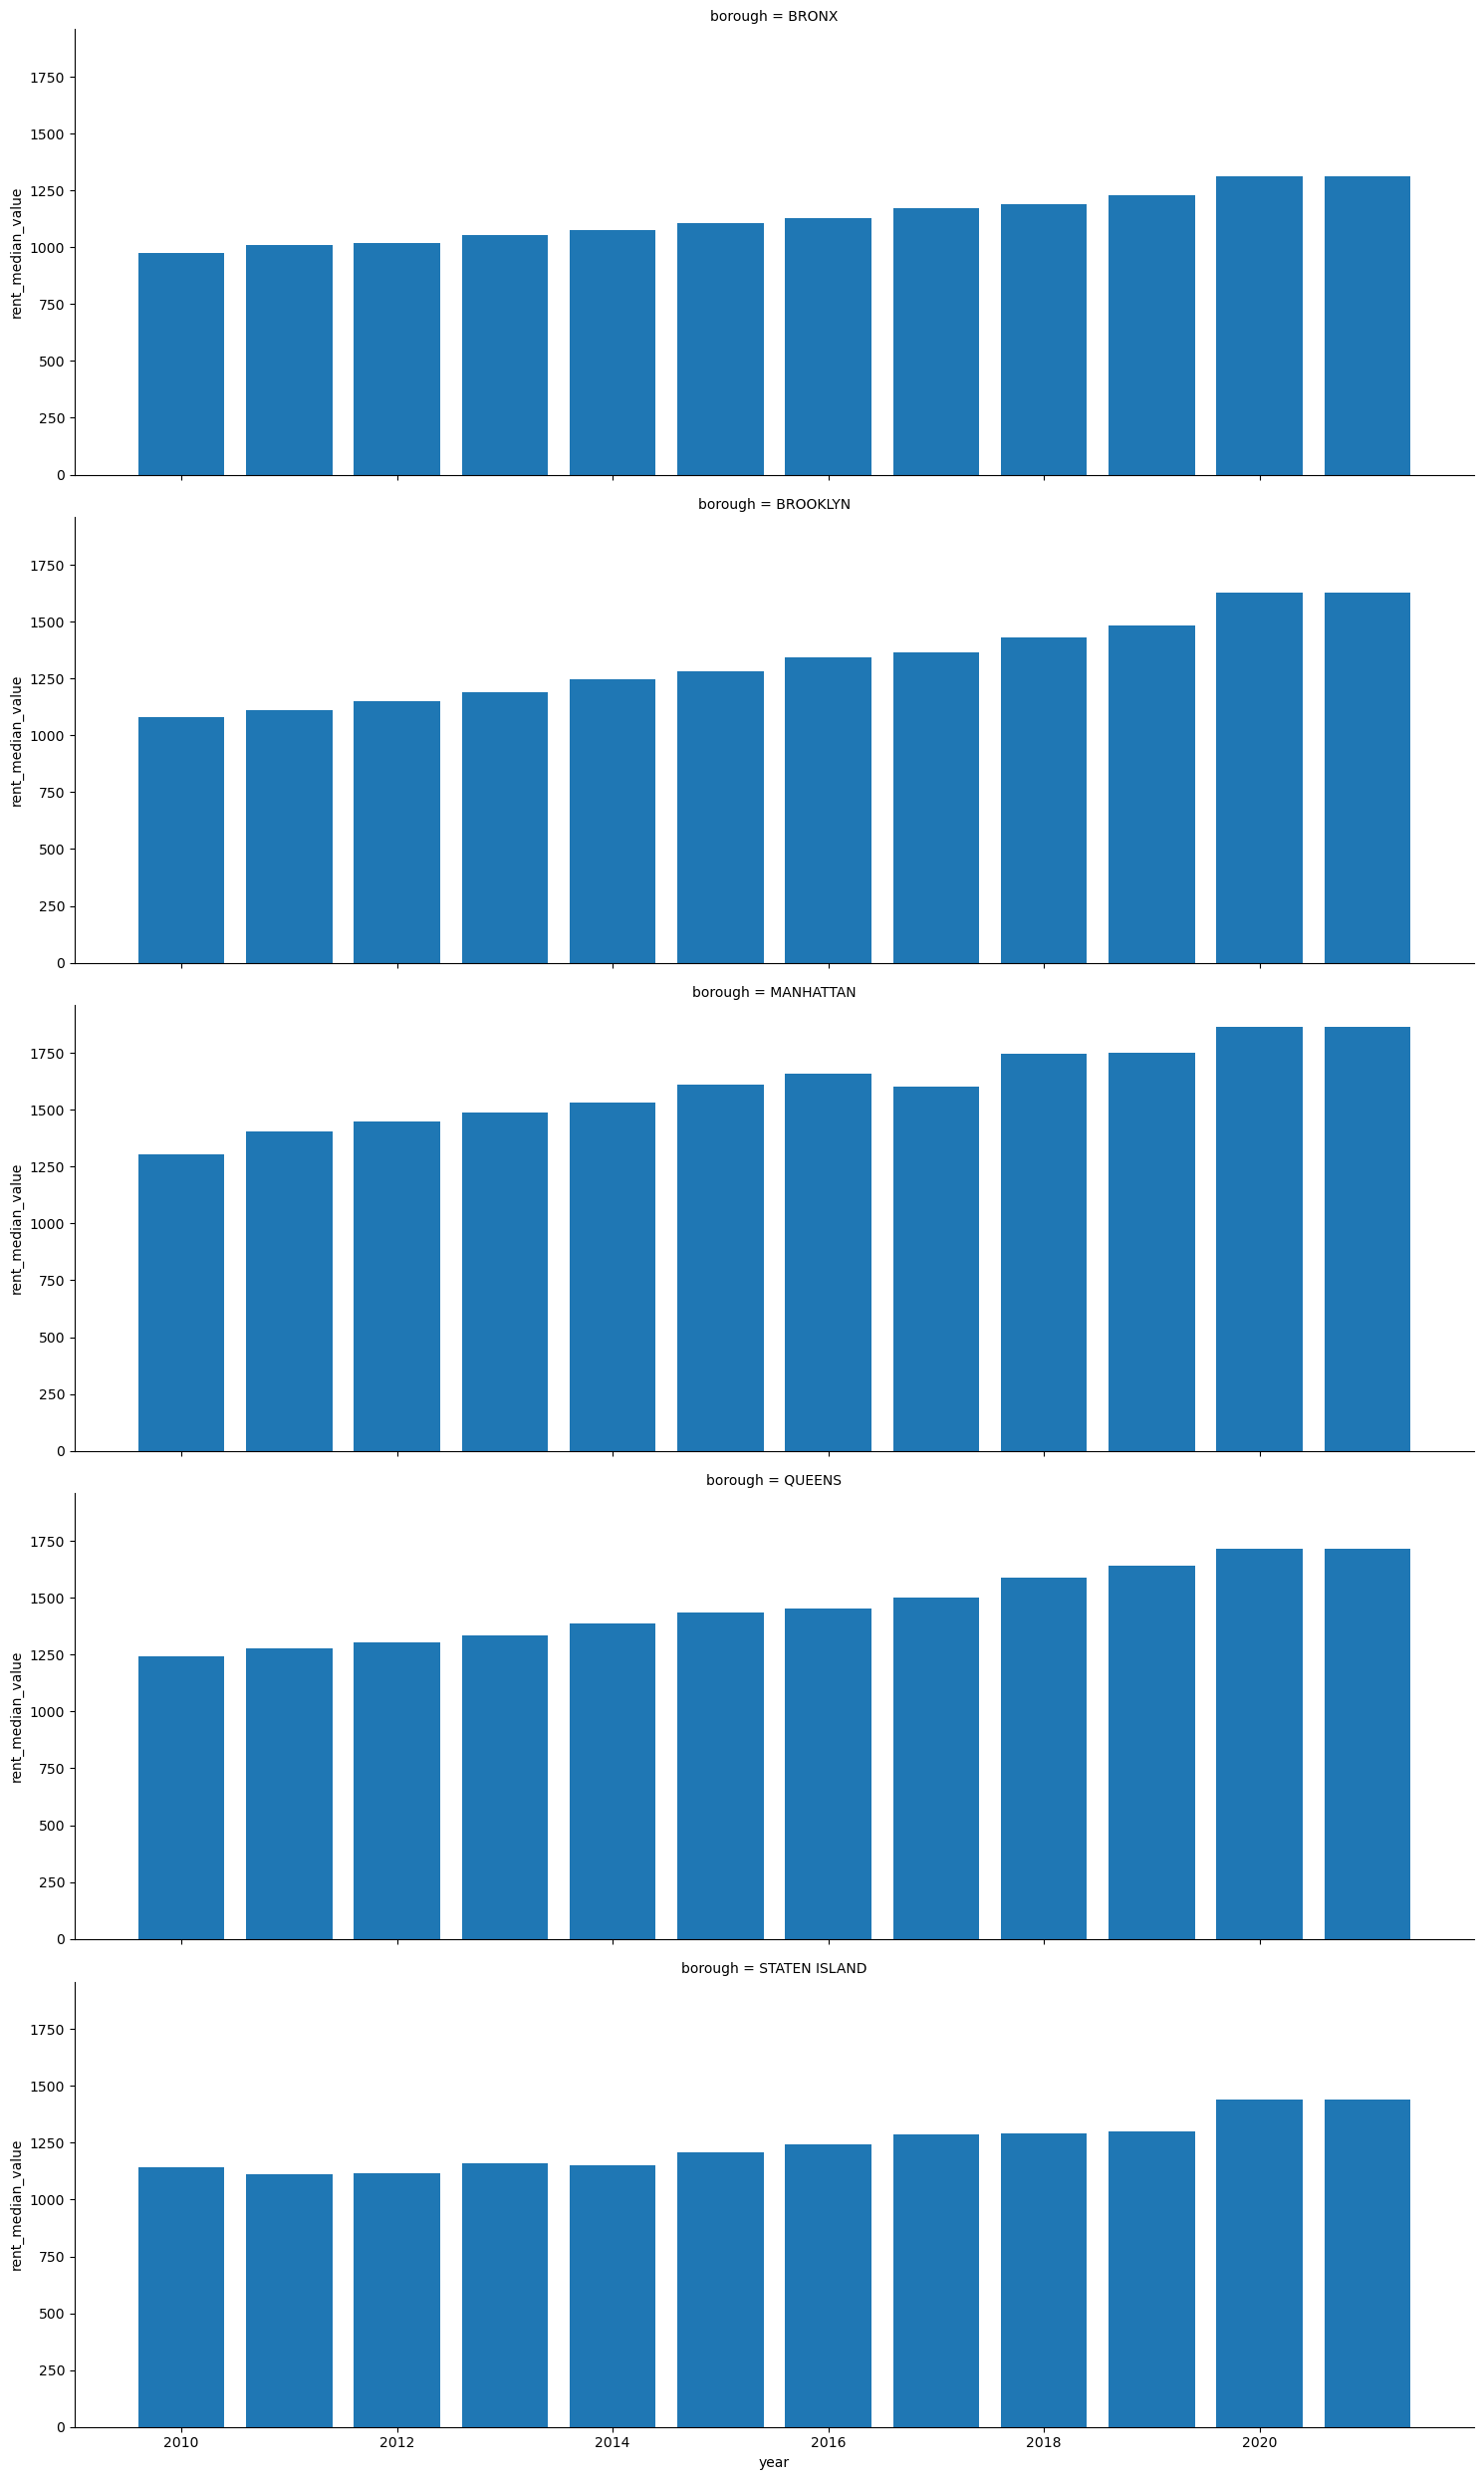

In [61]:
df.groupby(['borough'])['rent_median_value'].median().plot(kind='bar')
plt.show()

graph = sns.FacetGrid( df  , col = 'borough', size = 5, aspect = 3, col_wrap = 1)
graph.map(plt.bar, 'year', 'rent_median_value')
plt.show()

<AxesSubplot:xlabel='borough'>

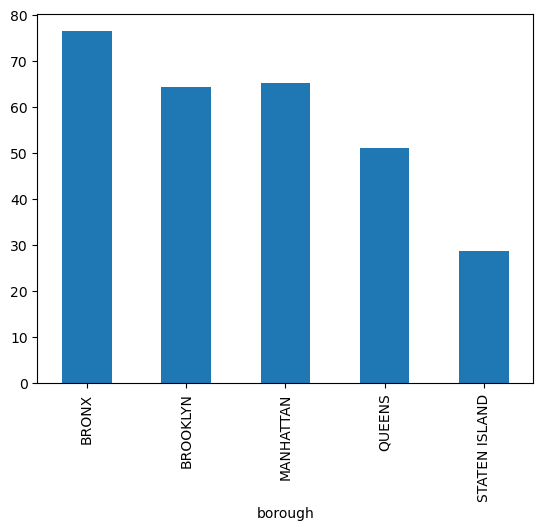

In [47]:
df.groupby(['borough'])['rent_units/tot_occ'].mean().plot(kind='bar')

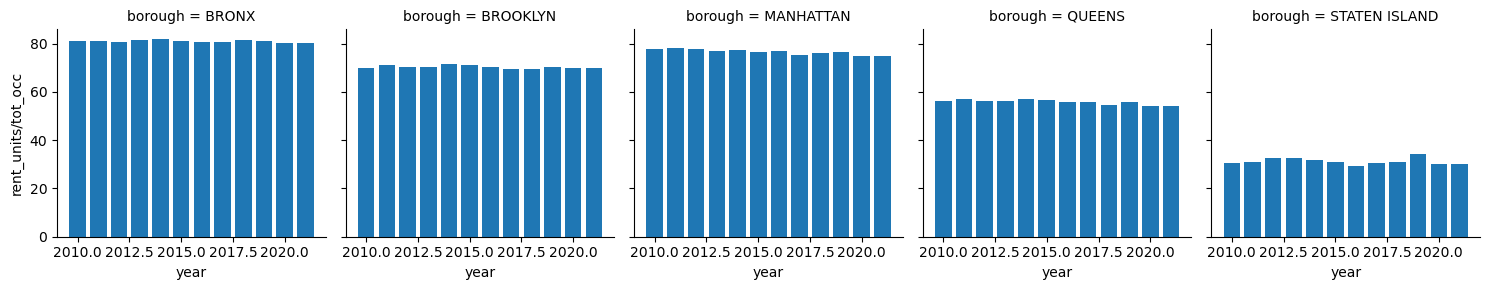

In [42]:
graph = sns.FacetGrid( df  , col = 'borough')
graph.map(plt.bar, 'year', 'rent_units/tot_occ')
plt.show()

In [75]:
temp = df[df['borough']== 'BROOKLYN']

temp['rent & delta'] = (temp['rent_median_value'].shift(-1) - temp['rent_median_value']) / temp['rent_median_value'] * 100


/var/folders/2y/7l8y_vkj01l4y5yq6yr69y0w0000gn/T/ipykernel_92956/675468455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['rent & delta'] = (temp['rent_median_value'].shift(-1) - temp['rent_median_value']) / temp['rent_median_value'] * 100


In [76]:
#graph = sns.FacetGrid( df  , col = 'borough', size = 5, aspect = 3, col_wrap = 1)
#graph.map(plt.bar, 'year', 'rent & delta')
#plt.show()

<AxesSubplot:>

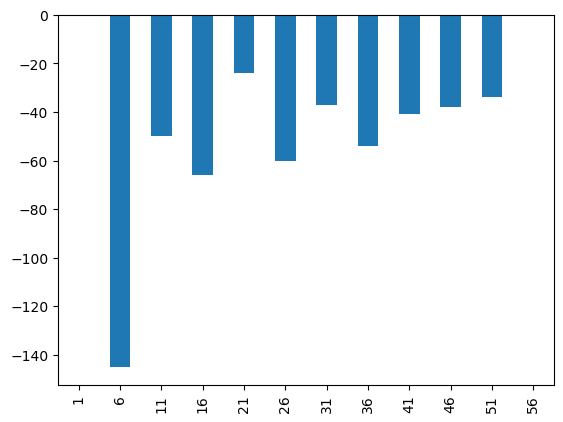

In [81]:
temp.rent_median_value.diff().shift(-1)

In [100]:
temp = df.sort_values(by=['borough','year'], ascending = False)
temp['rent % delta'] = (temp['rent_median_value'] - temp['rent_median_value'].shift(-1)) / temp['rent_median_value'] * 100


temp.loc[(temp['year'] == 2010), 'rent % delta'] = np.nan

temp

,label,borough,total_housing_units,occupied_housing_units,vacant_housing_units,1_room_units,2_room_units,3_room_units,4_room_units,5_room_units,...,owner_occupied_units,renter_occupied_units,occupants_per_room_<=1,occupants_per_room_1-1.5,occupants_per_room_>=1.5,owned_median_value,rent_median_value,year,rent_units/tot_occ,rent % delta
4,Estimate,STATEN ISLAND,184154.0,170762.0,13392.0,5897.0,4178.0,21285.0,23682.0,35537.0,...,119237.0,51525.0,161096.0,6259.0,3407.0,605500.0,1442.0,2021.0,30.173575,0.000000
9,Estimate,STATEN ISLAND,184154.0,170762.0,13392.0,5897.0,4178.0,21285.0,23682.0,35537.0,...,119237.0,51525.0,161096.0,6259.0,3407.0,605500.0,1442.0,2020.0,30.173575,9.916782
14,Estimate,STATEN ISLAND,181765.0,166297.0,15468.0,4976.0,5152.0,20272.0,26309.0,30292.0,...,109302.0,56995.0,158905.0,4067.0,3325.0,586500.0,1299.0,2019.0,34.273018,0.615858
19,Estimate,STATEN ISLAND,181186.0,167441.0,13745.0,3810.0,5464.0,22321.0,25265.0,29297.0,...,115872.0,51569.0,159088.0,6024.0,2329.0,556000.0,1291.0,2018.0,30.798311,0.387297
24,Estimate,STATEN ISLAND,180572.0,165990.0,14582.0,4523.0,4272.0,21432.0,22700.0,29064.0,...,115499.0,50491.0,158649.0,4900.0,2441.0,501300.0,1286.0,2017.0,30.418097,3.188180
29,Estimate,STATEN ISLAND,179391.0,164289.0,15102.0,4332.0,3503.0,20745.0,22038.0,31288.0,...,115862.0,48427.0,157236.0,5087.0,1966.0,477100.0,1245.0,2016.0,29.476715,2.971888
34,Estimate,STATEN ISLAND,178986.0,167462.0,11524.0,3198.0,2703.0,21530.0,24712.0,34855.0,...,115316.0,52146.0,160808.0,5042.0,1612.0,457700.0,1208.0,2015.0,31.139005,4.884106
39,Estimate,STATEN ISLAND,178596.0,164971.0,13625.0,4686.0,3817.0,21783.0,21853.0,38399.0,...,112509.0,52462.0,157490.0,5506.0,1975.0,441000.0,1149.0,2014.0,31.800741,-1.044386
44,Estimate,STATEN ISLAND,178035.0,167629.0,10406.0,3303.0,4244.0,21523.0,26505.0,31241.0,...,113017.0,54612.0,162496.0,3038.0,2095.0,432600.0,1161.0,2013.0,32.579088,3.962102
49,Estimate,STATEN ISLAND,177479.0,163468.0,14011.0,5041.0,3303.0,19977.0,25320.0,31468.0,...,110022.0,53446.0,158061.0,3353.0,2054.0,434000.0,1115.0,2012.0,32.695084,0.269058


/Users/sergioferreira/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


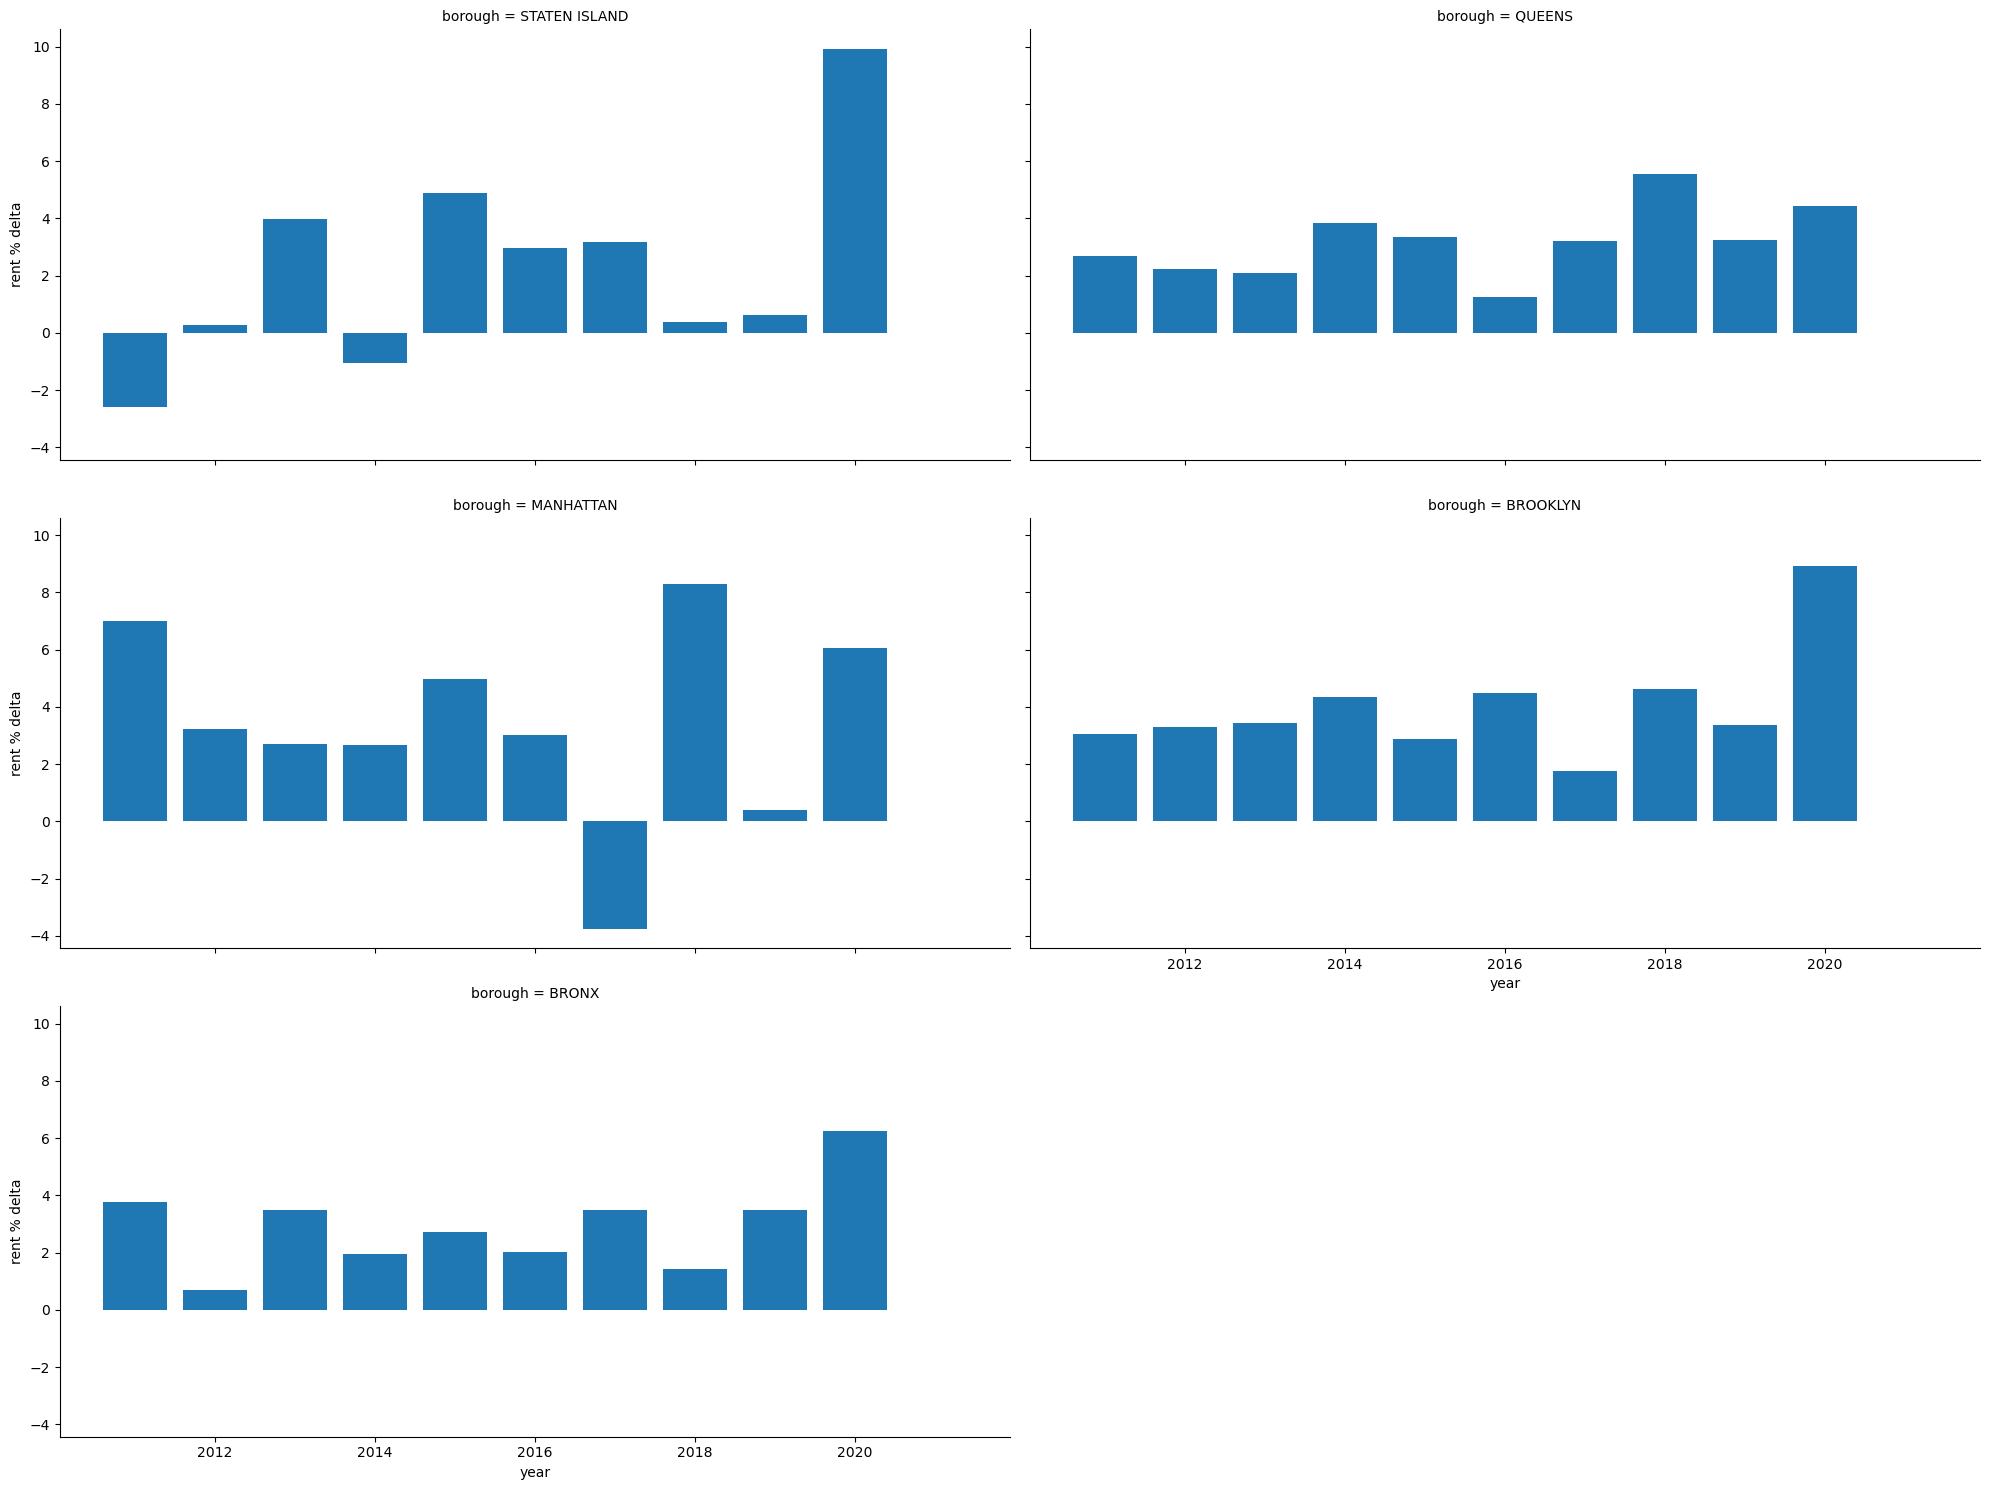

In [101]:
graph = sns.FacetGrid( temp  , col = 'borough', size = 5, aspect =2, col_wrap=2)
graph.map(plt.bar, 'year', 'rent % delta')
plt.show()

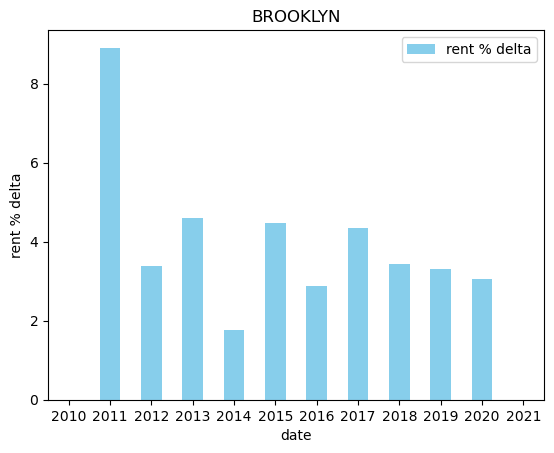

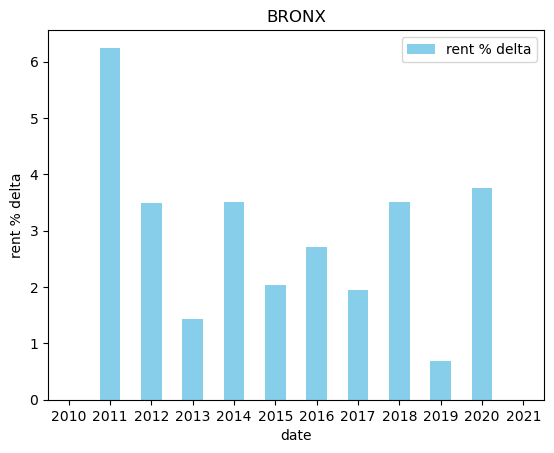

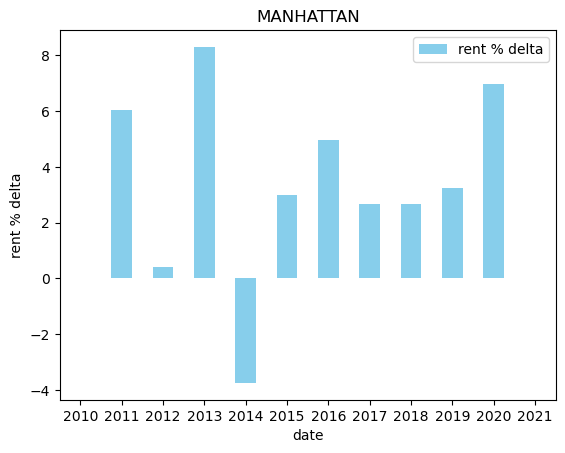

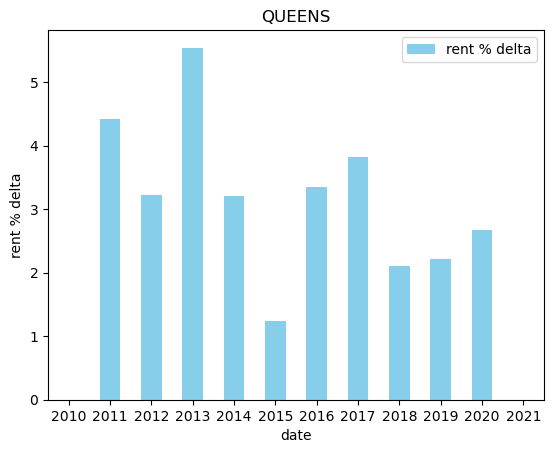

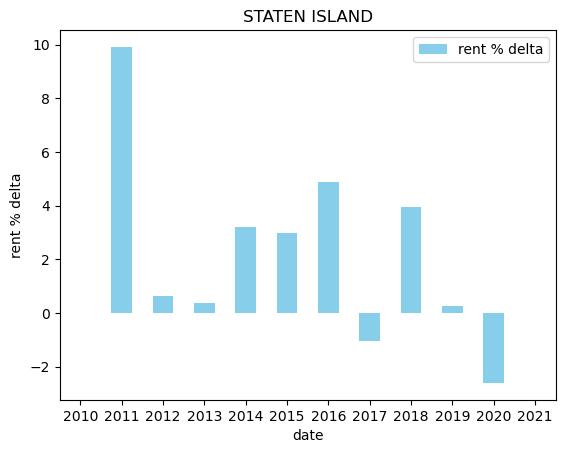

,rent % delta
2010-12-31,0.000000
2011-12-31,9.916782
2012-12-31,0.615858
2013-12-31,0.387297
2014-12-31,3.188180
2015-12-31,2.971888
2016-12-31,4.884106
2017-12-31,-1.044386
2018-12-31,3.962102
2019-12-31,0.269058


In [105]:
create_boro_chart(temp, "BROOKLYN", "rent % delta")
create_boro_chart(temp, "BRONX", "rent % delta")
create_boro_chart(temp, "MANHATTAN", "rent % delta")
create_boro_chart(temp, "QUEENS", "rent % delta")
create_boro_chart(temp, "STATEN ISLAND", "rent % delta")